# Regresión lineal

In [2]:
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [3]:
def derivada_L_w(x, y_pred, y):
    '''
    Calcula el resultado de la derivada de L respecto W
    y_pred = wx+b
    '''
    return 2*x*(y_pred - y)

def derivada_L_b(x, y_pred, y):
    '''
    Calcula el resultado de la derivada de L respecto b
    '''
    return 2*(y_pred - y)

In [4]:
def modelo(x, w, b):
    '''
    Calcula la regresión lineal basada en los parámetros w y b con respecto a x.

    Parámetros:
    x (array-like): Vector de características.
    w (array-like): Vector de pesos.
    b (float): Bias (también conocido como sesgo).

    Retorna:
    array-like: Resultado de la regresión lineal.
    '''

    return w*x + b

## Selección aleatoria de los pesos W y b

In [5]:
w = np.random.default_rng().random()
b = np.random.default_rng().random()

#(Feature, Y)
samples = [(1, 2), (2, 4), (3, 6), (4, 8)]

print(f"Valores de W = {w} y b = {b}")
for (x, y) in samples:
    y_pred = modelo(x, w, b)
    print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}")

Valores de W = 0.7972957298389859 y b = 0.6591813390991714
Predición del modelo = 1.4564770689381574 y su etiqueta  = 2
Predición del modelo = 2.253772798777143 y su etiqueta  = 4
Predición del modelo = 3.0510685286161294 y su etiqueta  = 6
Predición del modelo = 3.848364258455115 y su etiqueta  = 8


## Gráfica del modelo lineal

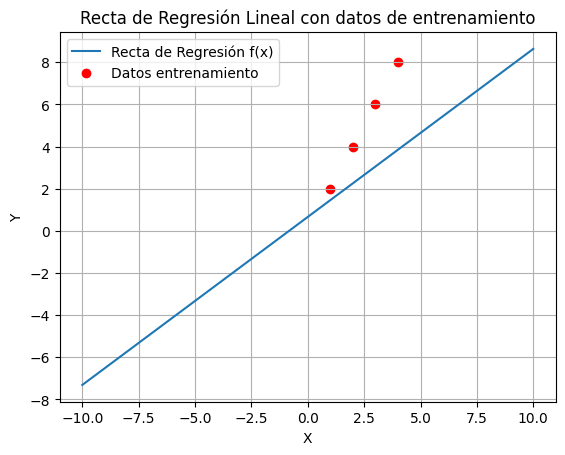

In [6]:
def plotRegresion(w, b):
    # Generar datos para graficar
    x_data = np.linspace(-10, 10, 100)  # Genera 100 puntos entre -10 y 10

    # Calcular los valores de y utilizando el modelo
    y_data = modelo(x_data, w, b)

    # Puntos de muestra
    samples = [(1, 2), (2, 4), (3, 6), (4, 8)]
    sample_x, sample_y = zip(*samples)

    # Graficar la recta generada por el modelo
    plt.plot(x_data, y_data, label='Recta de Regresión f(x)')
    plt.scatter(sample_x, sample_y, color='red', label='Datos entrenamiento')  # Agregar puntos de muestra
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Recta de Regresión Lineal con datos de entrenamiento')
    plt.legend()
    plt.grid(True)
    plt.show()
plotRegresion(w, b)

## Calculo del error de los samples de entrenamiento

In [7]:
def MSE(y_pred, y):
    return (y_pred - y)**2

In [8]:
errorBySample = []
for (x, y) in samples:
    y_pred = modelo(x, w, b)
    error = MSE(y_pred, y)
    errorBySample.append(error)
    print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}, MSE {error}")

Predición del modelo = 1.4564770689381574 y su etiqueta  = 2, MSE 0.29541717659005645
Predición del modelo = 2.253772798777143 y su etiqueta  = 4, MSE 3.0493094382906114
Predición del modelo = 3.0510685286161294 y su etiqueta  = 6, MSE 8.69619682291824
Predición del modelo = 3.848364258455115 y su etiqueta  = 8, MSE 17.236079330472947


In [9]:
def promedio(list):
    return np.mean(list)

## Actualización de parametros después de todos los datos de entrenamiento

In [10]:
errorBySample = []
derivadas_w = []
derivadas_b = []
alfa = 0.0005
#Recorrer los samples
for (x, y) in samples:
    #Predecir con mi modelo
    y_pred = modelo(x, w, b)
    #Calcular el error respecto a la etiqueta real.
    error = MSE(y_pred, y)
    errorBySample.append(error)
    #Calculo la derivada de L con respecto a W y b para este sample y las guardo
    derivadaW = derivada_L_w(x, y_pred, y)
    derivadas_w.append(derivadaW)
    derivadaB = derivada_L_b(x, y_pred, y)
    derivadas_b.append(derivadaB)
    print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}, MSE {error}, derivada W {derivadaW:.2F}, derivada b {derivadaB:.2F}")

#A este punto terminamos con el conjunto de datos de entrenamiento y ya calculamos todas las derivadas para cada sample además del error.
    
#Calculamos el promedio de derivadas de W y actualizamos el valor
promedio_derivada_w = promedio(derivadas_w)
w = w - alfa*promedio_derivada_w

#Calculamos el promedio de derivadas de b y actualizamos el valor
promedio_derivada_b = promedio(derivadas_b)
b = b - alfa*promedio_derivada_b
costError = promedio(errorBySample)
print(f"Valor de función de coste = {costError:.4F}, nuevo valor de W = {w:.2F}, B = {b:.2F}")

Predición del modelo = 1.4564770689381574 y su etiqueta  = 2, MSE 0.29541717659005645, derivada W -1.09, derivada b -1.09
Predición del modelo = 2.253772798777143 y su etiqueta  = 4, MSE 3.0493094382906114, derivada W -6.98, derivada b -3.49
Predición del modelo = 3.0510685286161294 y su etiqueta  = 6, MSE 8.69619682291824, derivada W -17.69, derivada b -5.90
Predición del modelo = 3.848364258455115 y su etiqueta  = 8, MSE 17.236079330472947, derivada W -33.21, derivada b -8.30
Valor de función de coste = 7.3193, nuevo valor de W = 0.80, B = 0.66


## Epoch
La cantidad de veces que recorremos el set de datos de entrenamiento para ajustar nuestro modelo.

Epoca 0, valor de función de perdida (Loss Function) = 7.20003, nuevo valor de W = 0.87778, B = 0.68480


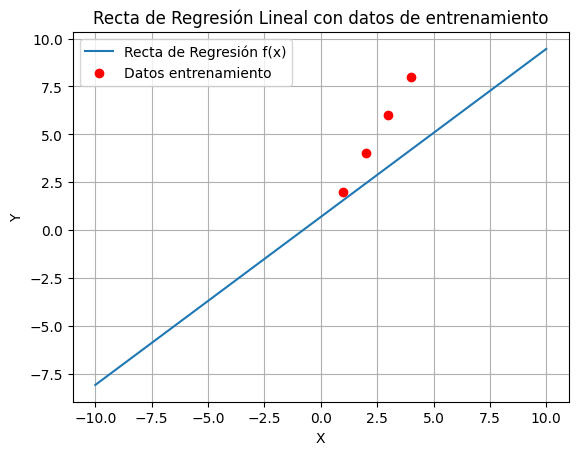

Epoca 8, valor de función de perdida (Loss Function) = 1.89566, nuevo valor de W = 1.28196, B = 0.80956


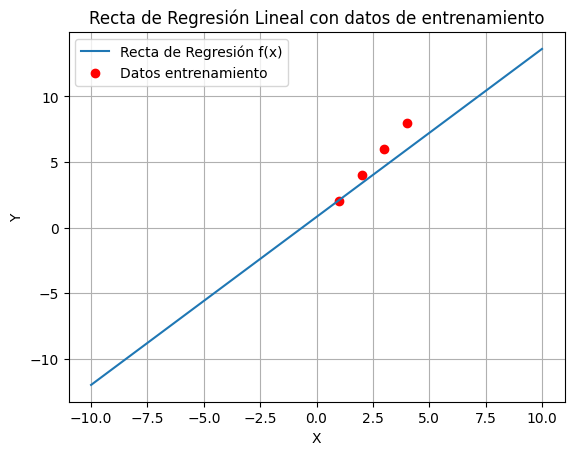

Epoca 16, valor de función de perdida (Loss Function) = 0.57861, nuevo valor de W = 1.48506, B = 0.86609


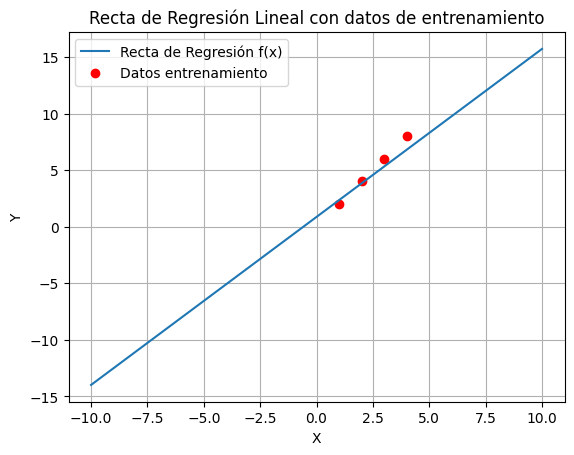

Epoca 24, valor de función de perdida (Loss Function) = 0.24967, nuevo valor de W = 1.58803, B = 0.88871


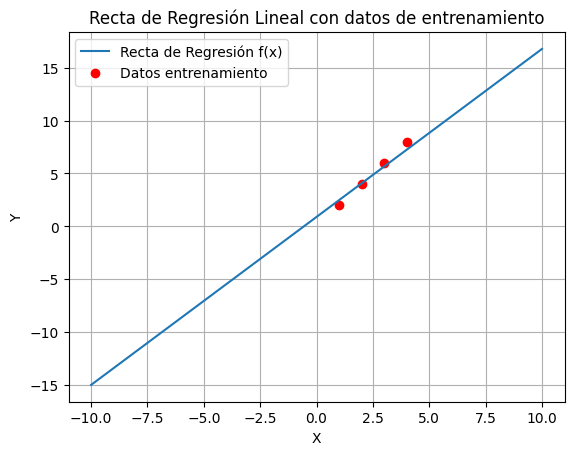

Epoca 32, valor de función de perdida (Loss Function) = 0.16564, nuevo valor de W = 1.64115, B = 0.89452


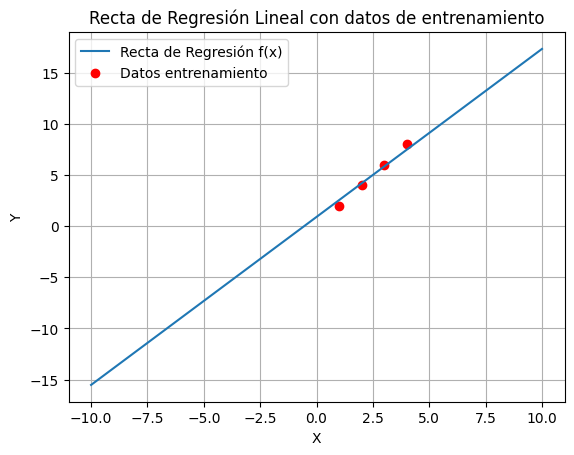

Epoca 40, valor de función de perdida (Loss Function) = 0.14236, nuevo valor de W = 1.66942, B = 0.89202


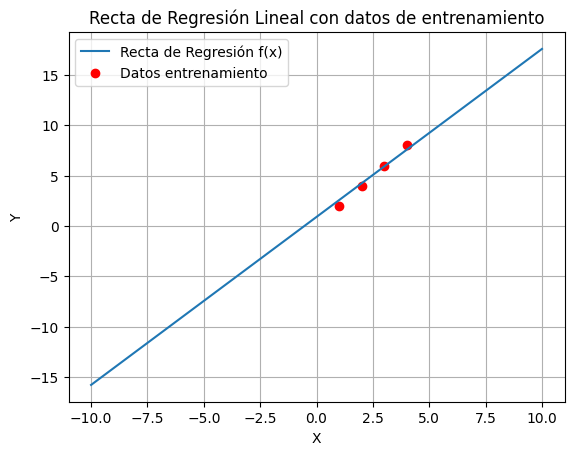

Epoca 48, valor de función de perdida (Loss Function) = 0.13419, nuevo valor de W = 1.68531, B = 0.88546


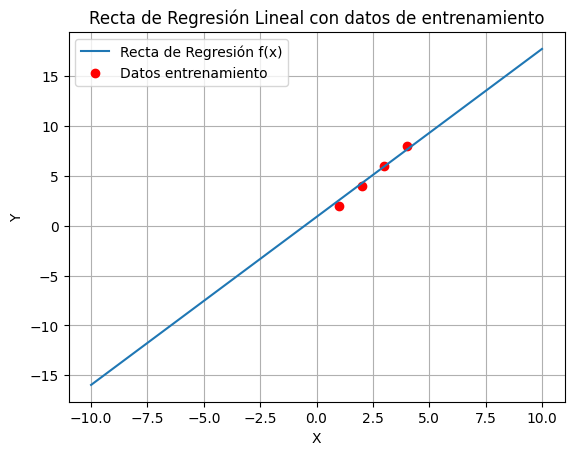

Epoca 56, valor de función de perdida (Loss Function) = 0.12983, nuevo valor de W = 1.69500, B = 0.87693


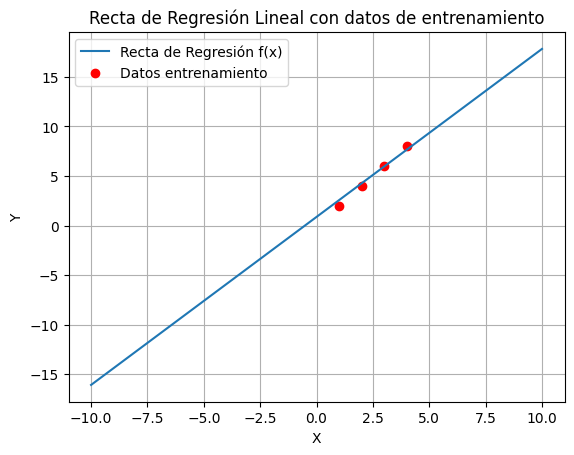

Epoca 64, valor de función de perdida (Loss Function) = 0.12646, nuevo valor de W = 1.70159, B = 0.86749


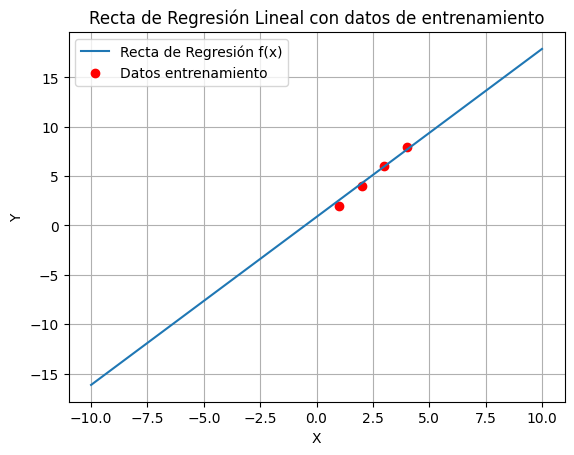

Epoca 72, valor de función de perdida (Loss Function) = 0.12339, nuevo valor de W = 1.70662, B = 0.85766


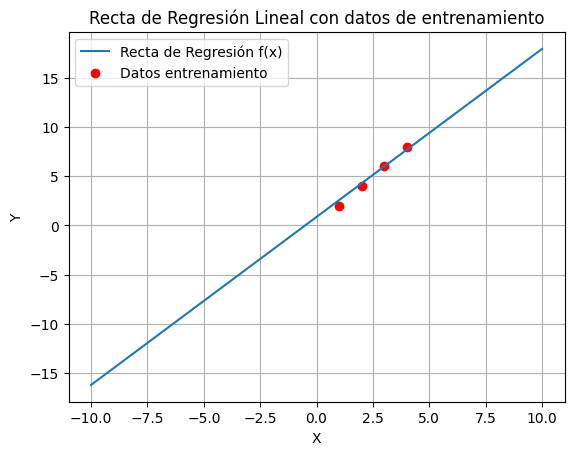

Epoca 80, valor de función de perdida (Loss Function) = 0.12045, nuevo valor de W = 1.71085, B = 0.84769


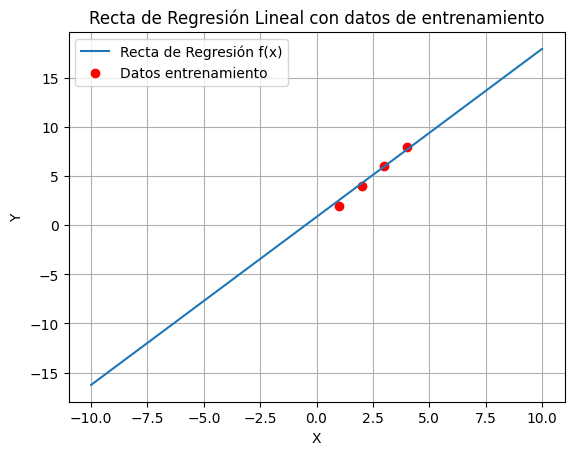

Epoca 88, valor de función de perdida (Loss Function) = 0.11759, nuevo valor de W = 1.71466, B = 0.83772


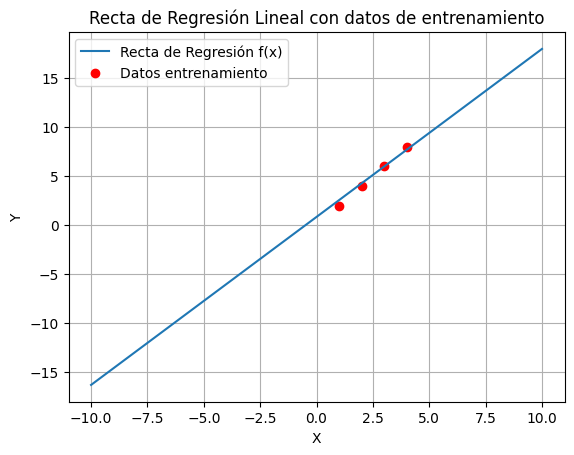

Epoca 96, valor de función de perdida (Loss Function) = 0.11481, nuevo valor de W = 1.71824, B = 0.82780


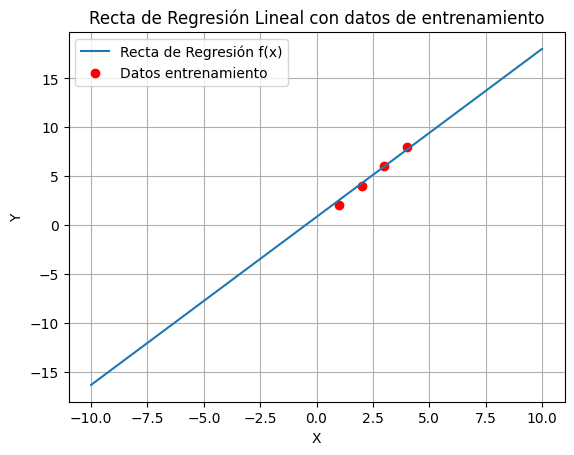

Epoca 104, valor de función de perdida (Loss Function) = 0.11209, nuevo valor de W = 1.72169, B = 0.81797


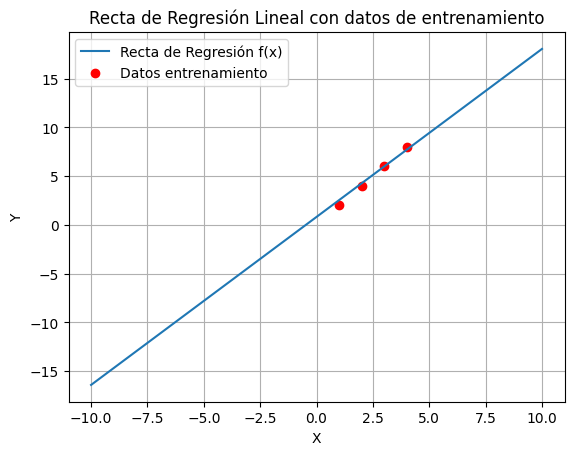

Epoca 112, valor de función de perdida (Loss Function) = 0.10943, nuevo valor de W = 1.72505, B = 0.80824


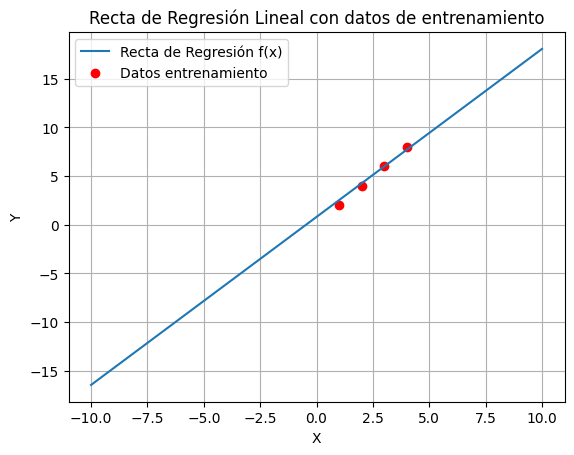

Epoca 120, valor de función de perdida (Loss Function) = 0.10684, nuevo valor de W = 1.72835, B = 0.79862


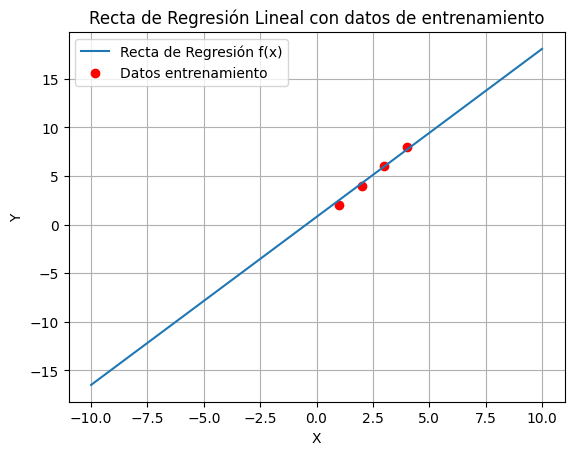

Epoca 128, valor de función de perdida (Loss Function) = 0.10431, nuevo valor de W = 1.73159, B = 0.78911


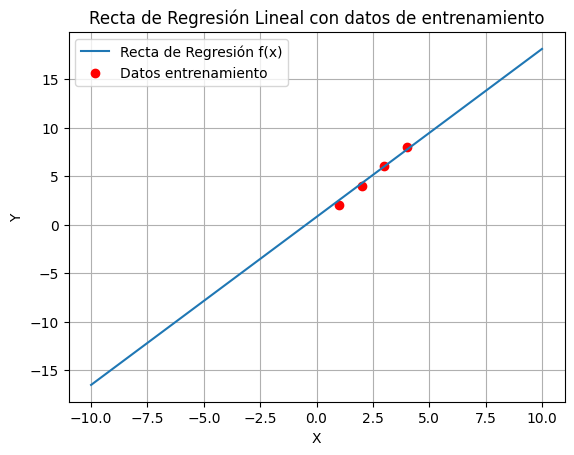

Epoca 136, valor de función de perdida (Loss Function) = 0.10184, nuevo valor de W = 1.73480, B = 0.77971


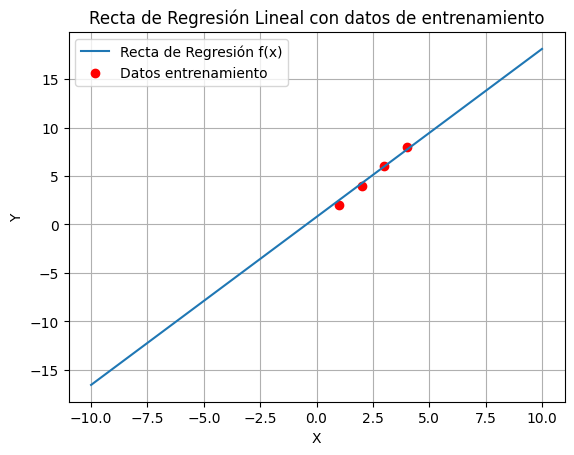

Epoca 144, valor de función de perdida (Loss Function) = 0.09943, nuevo valor de W = 1.73796, B = 0.77042


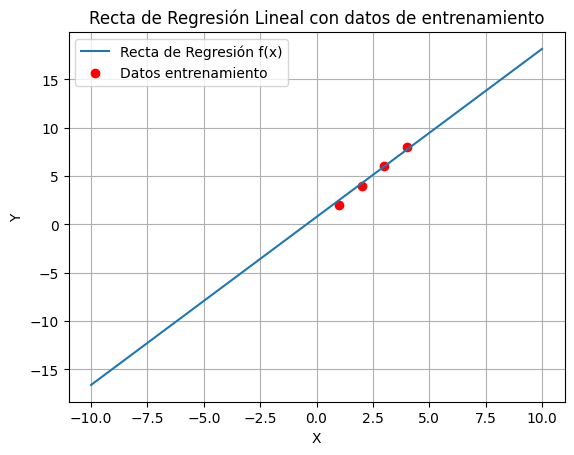

Epoca 152, valor de función de perdida (Loss Function) = 0.09707, nuevo valor de W = 1.74108, B = 0.76124


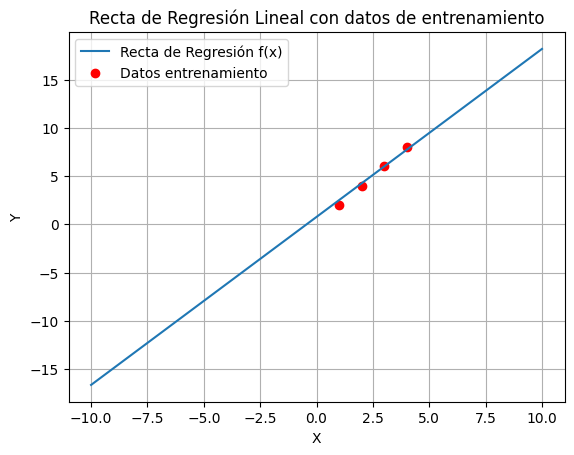

Epoca 160, valor de función de perdida (Loss Function) = 0.09477, nuevo valor de W = 1.74417, B = 0.75217


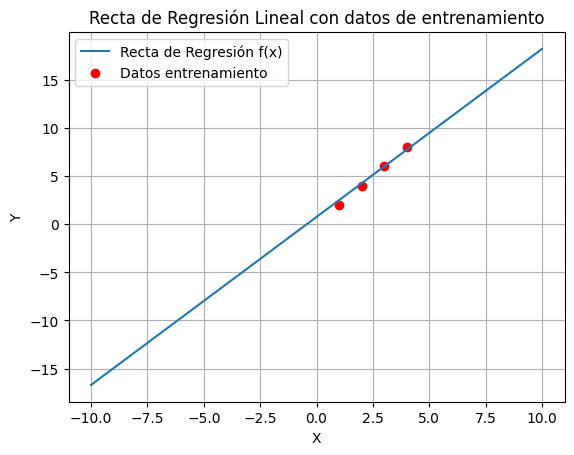

Epoca 168, valor de función de perdida (Loss Function) = 0.09253, nuevo valor de W = 1.74722, B = 0.74321


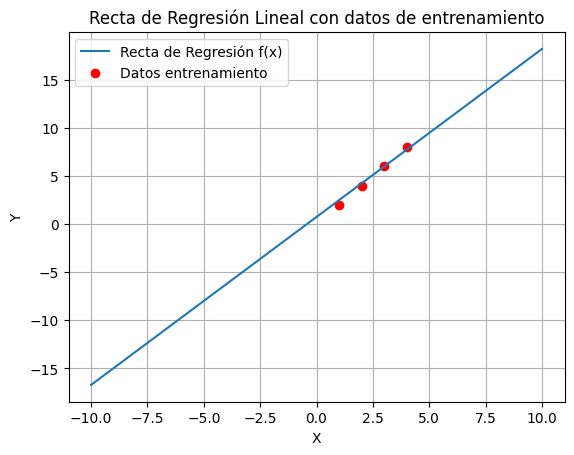

Epoca 176, valor de función de perdida (Loss Function) = 0.09034, nuevo valor de W = 1.75023, B = 0.73436


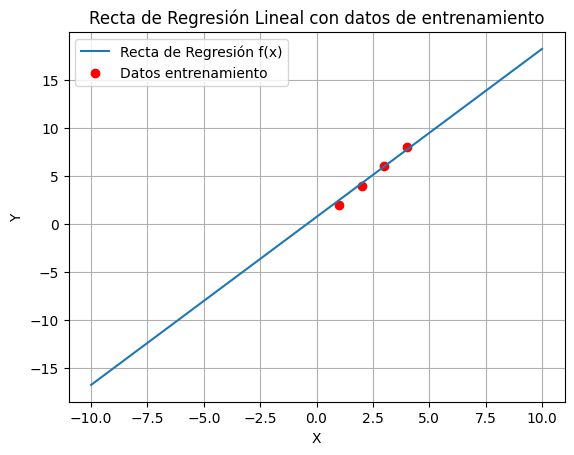

Epoca 184, valor de función de perdida (Loss Function) = 0.08820, nuevo valor de W = 1.75320, B = 0.72561


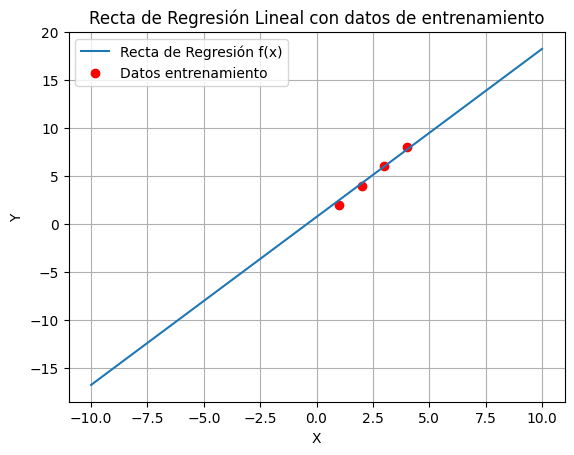

Epoca 192, valor de función de perdida (Loss Function) = 0.08611, nuevo valor de W = 1.75614, B = 0.71697


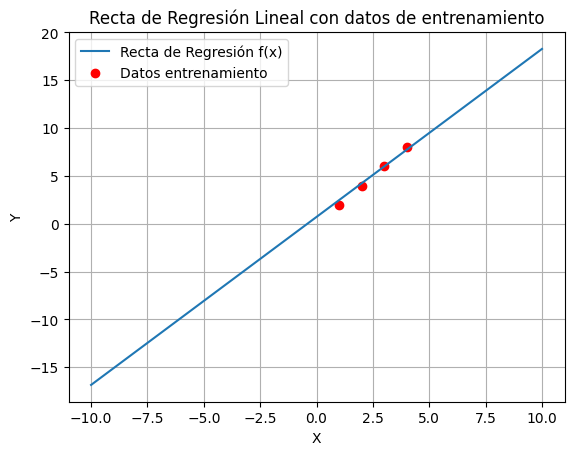

Epoca 200, valor de función de perdida (Loss Function) = 0.08407, nuevo valor de W = 1.75905, B = 0.70843


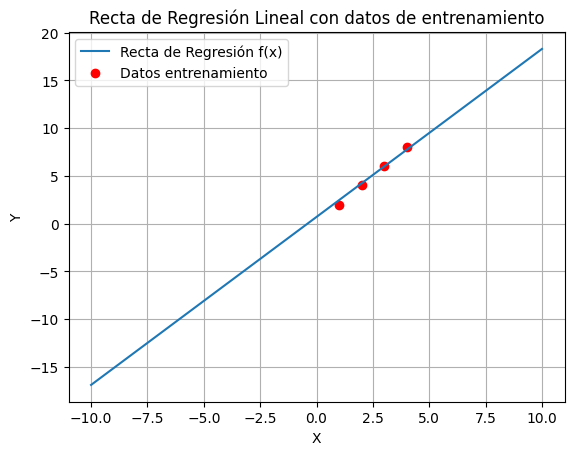

Epoca 208, valor de función de perdida (Loss Function) = 0.08208, nuevo valor de W = 1.76192, B = 0.69999


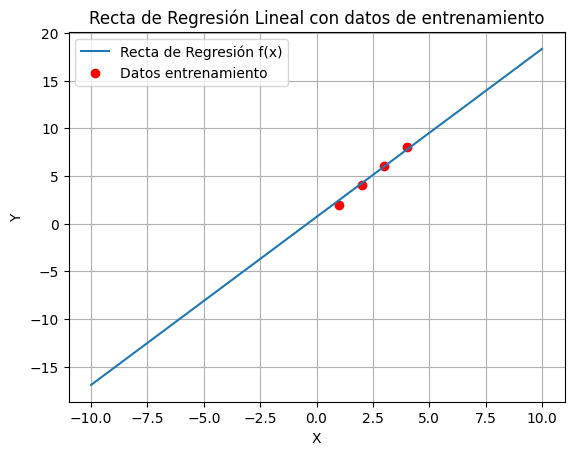

Epoca 216, valor de función de perdida (Loss Function) = 0.08013, nuevo valor de W = 1.76476, B = 0.69165


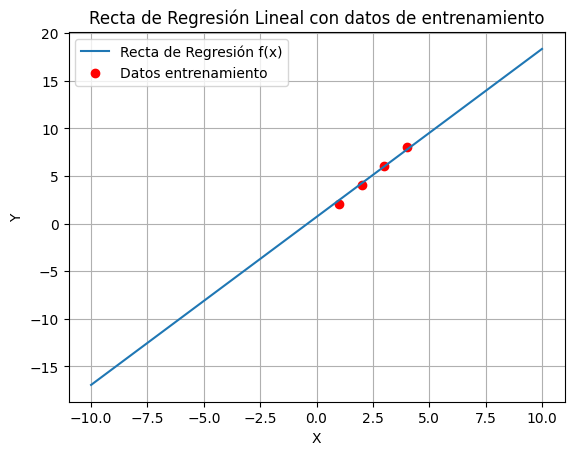

Epoca 224, valor de función de perdida (Loss Function) = 0.07824, nuevo valor de W = 1.76756, B = 0.68341


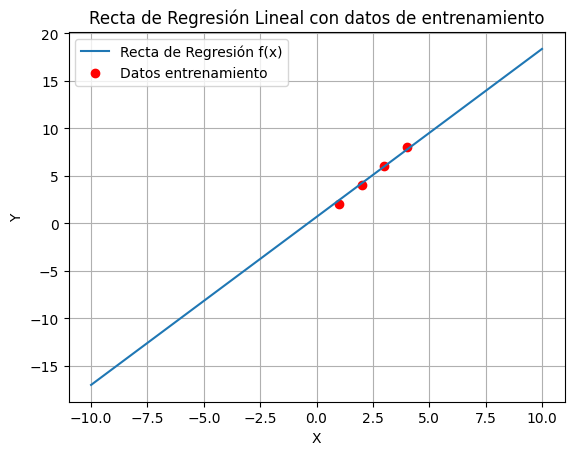

Epoca 232, valor de función de perdida (Loss Function) = 0.07638, nuevo valor de W = 1.77033, B = 0.67527


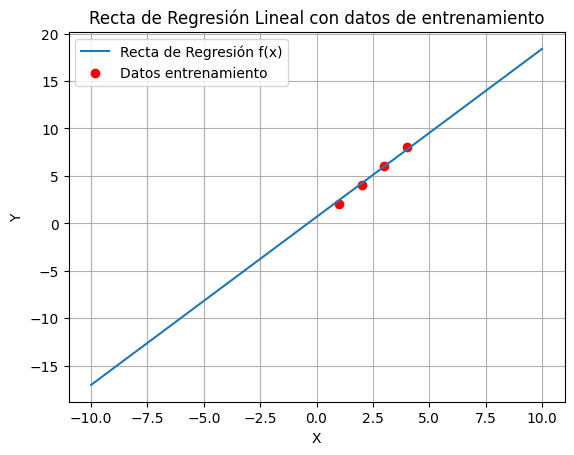

Epoca 240, valor de función de perdida (Loss Function) = 0.07457, nuevo valor de W = 1.77306, B = 0.66722


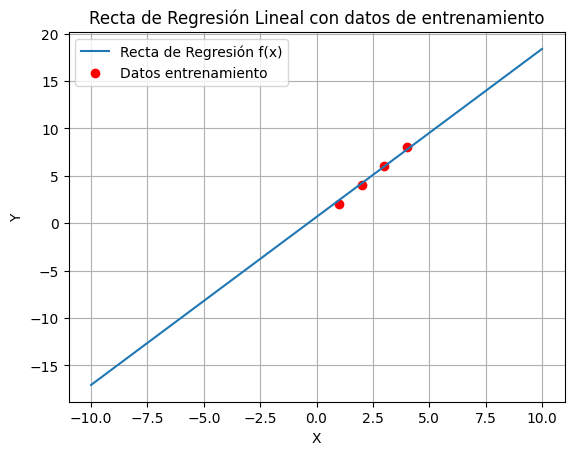

Epoca 248, valor de función de perdida (Loss Function) = 0.07281, nuevo valor de W = 1.77577, B = 0.65927


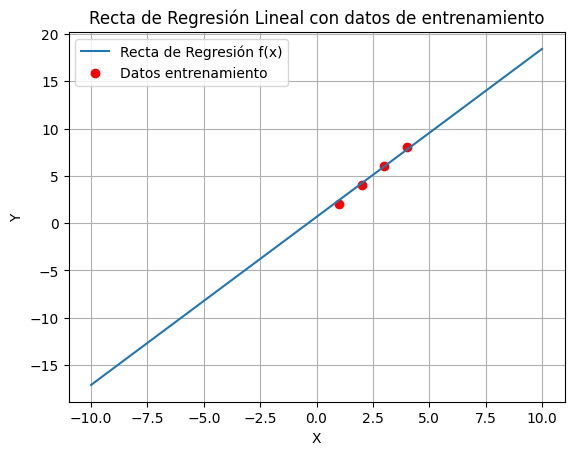

Epoca 256, valor de función de perdida (Loss Function) = 0.07108, nuevo valor de W = 1.77844, B = 0.65142


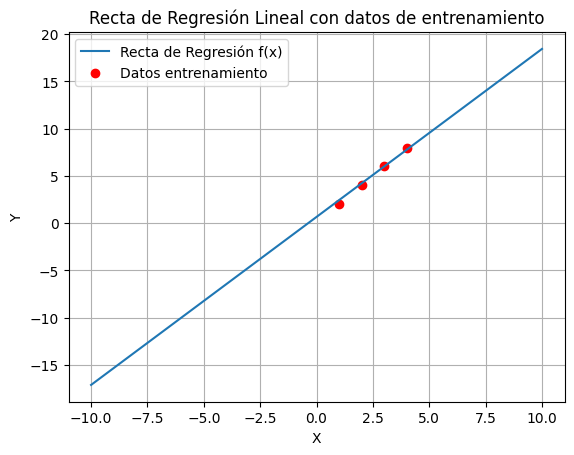

Epoca 264, valor de función de perdida (Loss Function) = 0.06940, nuevo valor de W = 1.78108, B = 0.64366


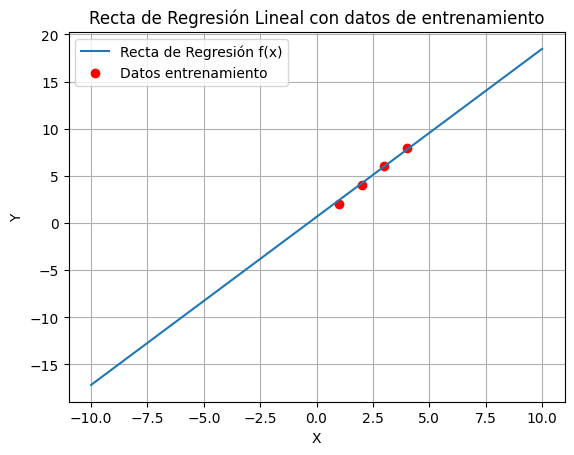

Epoca 272, valor de función de perdida (Loss Function) = 0.06776, nuevo valor de W = 1.78369, B = 0.63599


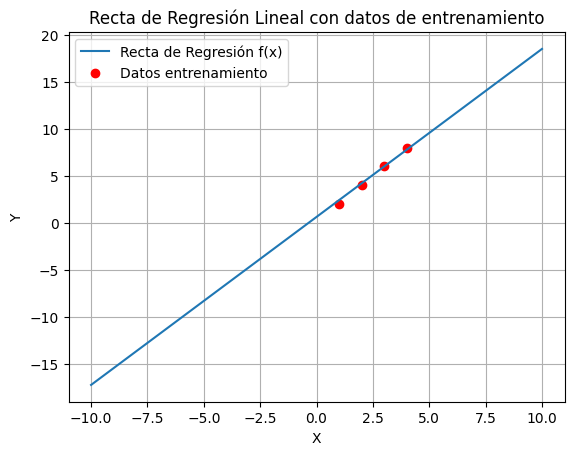

Epoca 280, valor de función de perdida (Loss Function) = 0.06615, nuevo valor de W = 1.78626, B = 0.62841


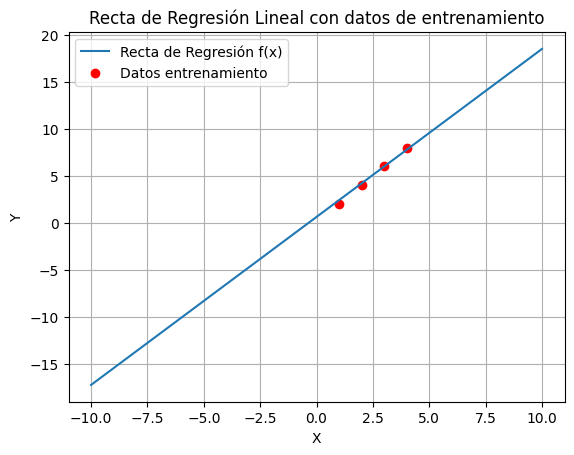

Epoca 288, valor de función de perdida (Loss Function) = 0.06459, nuevo valor de W = 1.78881, B = 0.62093


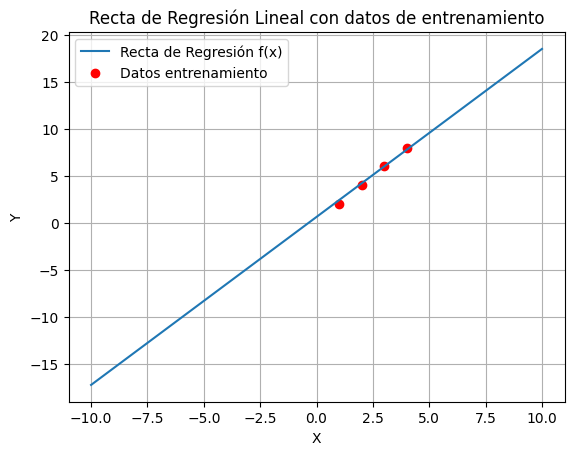

Epoca 296, valor de función de perdida (Loss Function) = 0.06306, nuevo valor de W = 1.79132, B = 0.61353


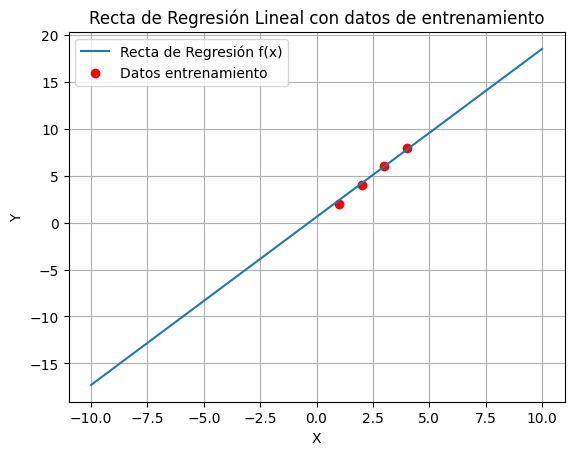

Epoca 304, valor de función de perdida (Loss Function) = 0.06156, nuevo valor de W = 1.79381, B = 0.60622


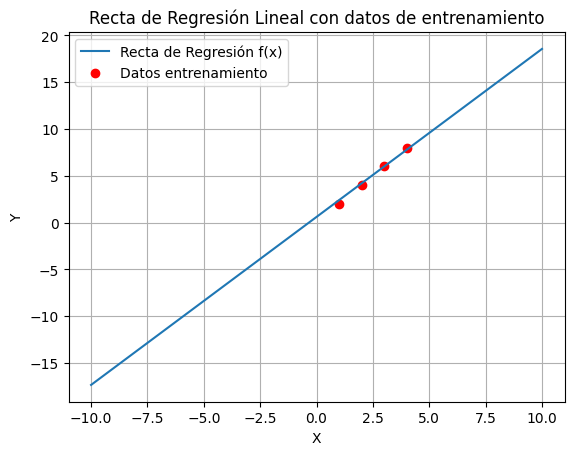

Epoca 312, valor de función de perdida (Loss Function) = 0.06010, nuevo valor de W = 1.79627, B = 0.59900


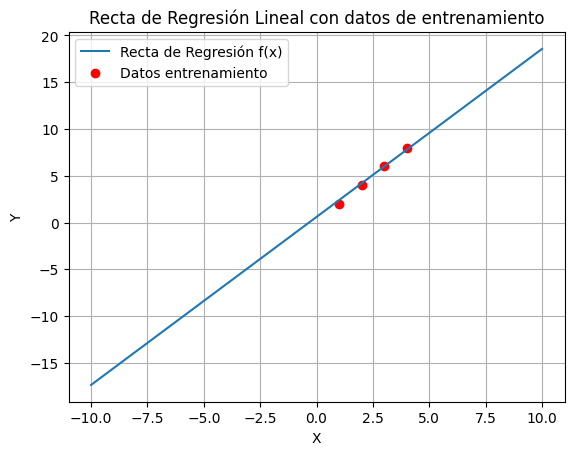

Epoca 320, valor de función de perdida (Loss Function) = 0.05868, nuevo valor de W = 1.79869, B = 0.59186


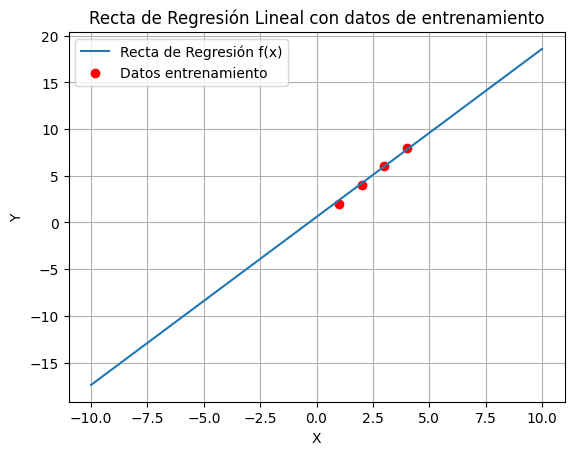

Epoca 328, valor de función de perdida (Loss Function) = 0.05729, nuevo valor de W = 1.80109, B = 0.58481


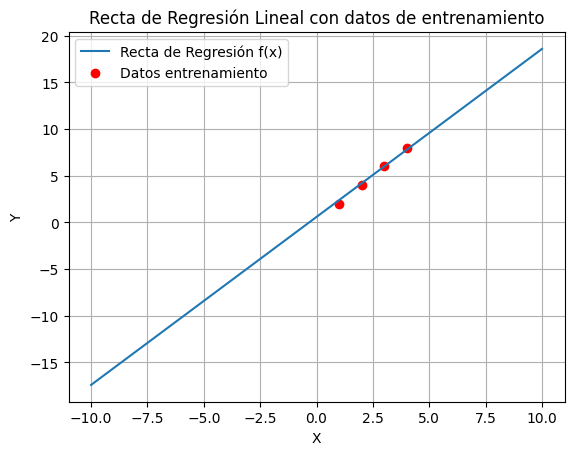

Epoca 336, valor de función de perdida (Loss Function) = 0.05593, nuevo valor de W = 1.80346, B = 0.57785


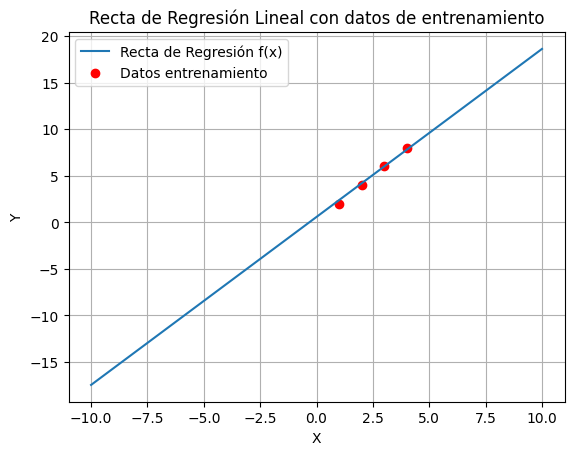

Epoca 344, valor de función de perdida (Loss Function) = 0.05461, nuevo valor de W = 1.80580, B = 0.57096


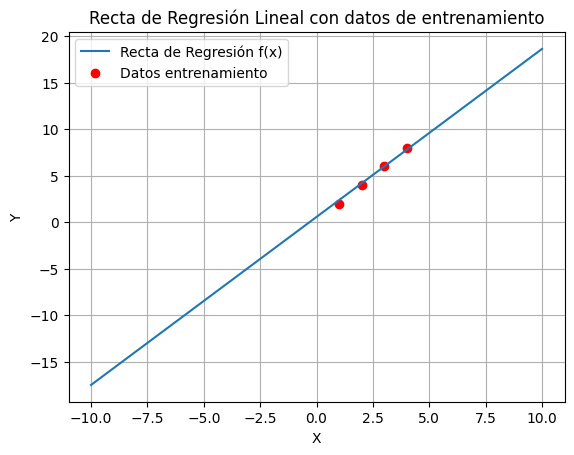

Epoca 352, valor de función de perdida (Loss Function) = 0.05332, nuevo valor de W = 1.80812, B = 0.56416


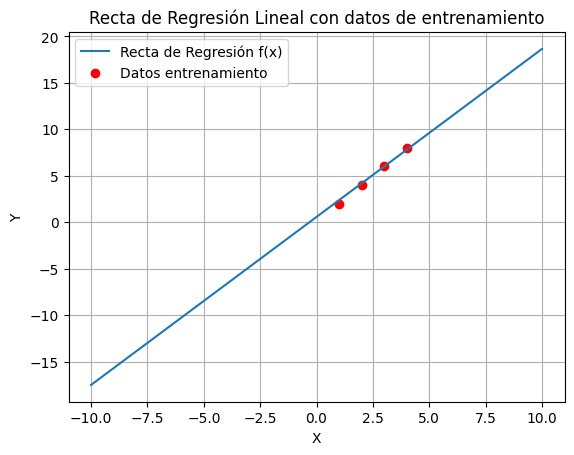

Epoca 360, valor de función de perdida (Loss Function) = 0.05205, nuevo valor de W = 1.81040, B = 0.55744


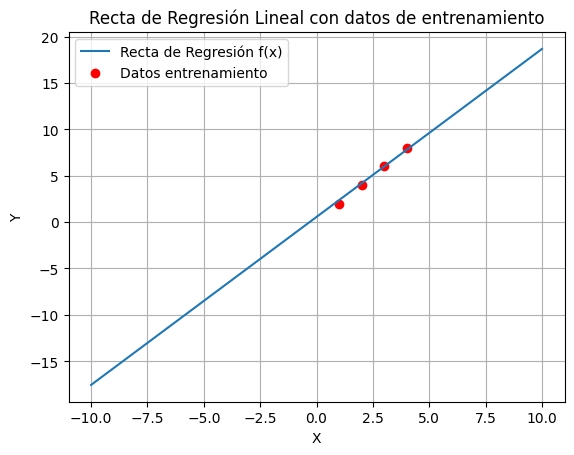

Epoca 368, valor de función de perdida (Loss Function) = 0.05082, nuevo valor de W = 1.81266, B = 0.55080


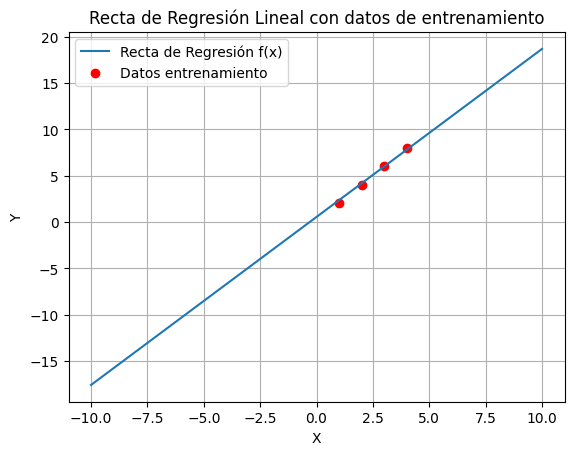

Epoca 376, valor de función de perdida (Loss Function) = 0.04962, nuevo valor de W = 1.81489, B = 0.54424


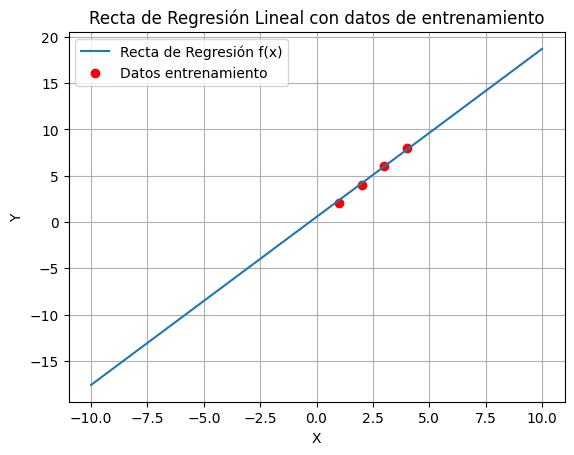

Epoca 384, valor de función de perdida (Loss Function) = 0.04844, nuevo valor de W = 1.81710, B = 0.53775


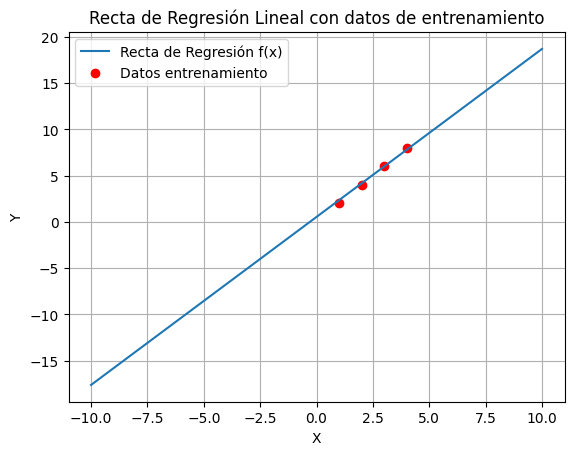

Epoca 392, valor de función de perdida (Loss Function) = 0.04729, nuevo valor de W = 1.81928, B = 0.53135


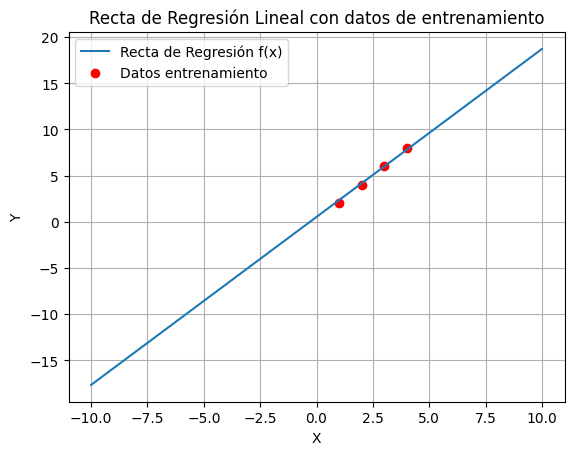

In [11]:
errorBySample = []
derivadas_w = []
derivadas_b = []
epochs = 400
plotEvery = epochs//50
alfa = 0.005
for epoch in range(epochs):
    for (x, y) in samples:
        y_pred = modelo(x, w, b)
        error = MSE(y_pred, y)
        errorBySample.append(error)
        derivadaW = derivada_L_w(x, y_pred, y)
        derivadas_w.append(derivadaW)
        derivadaB = derivada_L_b(x, y_pred, y)
        derivadas_b.append(derivadaB)
        #print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}, MSE {error}, derivada W {derivadaW:.2F}, derivada b {derivadaB:.2F}")

    promedio_derivada_w = promedio(derivadas_w)
    w = w - alfa*promedio_derivada_w

    promedio_derivada_b = promedio(derivadas_b)
    b = b - alfa*promedio_derivada_b
    costError = promedio(errorBySample)

    if (epoch % plotEvery) == 0:
        print(f"Epoca {epoch}, valor de función de perdida (Loss Function) = {costError:.5F}, nuevo valor de W = {w:.5F}, B = {b:.5F}")
        plotRegresion(w, b)
    
    #Reiniciamos
    errorBySample = []
    derivadas_w = []
    derivadas_b = []

In [37]:
# Evaluando el modelo
for (x, y) in samples:
        y_pred = modelo(x, w, b)
        error = MSE(y_pred, y)
        errorBySample.append(error)
        derivadaW = derivada_L_w(x, y_pred, y)
        derivadas_w.append(derivadaW)
        derivadaB = derivada_L_b(x, y_pred, y)
        derivadas_b.append(derivadaB)
        print(f"Predición del modelo = {y_pred} y su etiqueta  = {y}, MSE {error}, derivada W {derivadaW:.2F}, derivada b {derivadaB:.2F}")

Predición del modelo = 2.331256959220065 y su etiqueta  = 2, MSE 0.10973117303172376, derivada W 0.66, derivada b 0.66
Predición del modelo = 4.160516681895768 y su etiqueta  = 4, MSE 0.025765605166827087, derivada W 0.64, derivada b 0.32
Predición del modelo = 5.9897764045714705 y su etiqueta  = 6, MSE 0.00010452190348624855, derivada W -0.06, derivada b -0.02
Predición del modelo = 7.819036127247173 y su etiqueta  = 8, MSE 0.03274792324170124, derivada W -1.45, derivada b -0.36
